# Week 1 Social Graphs 02805

Imports

In [2]:
import networkx as nx
import urllib2
import json
import matplotlib.pyplot as plt

API

In [3]:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title1 = "titles=Doctor_Strange"
title2 = "titles=Tensor"
title3 = "titles=Tardigrade"
title4 = "titles=Wall%27s_(ice_cream)"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

query1 = "%s%s&%s&%s&%s" % (baseurl,action,title1,content,dataformat)
query2 = "%s%s&%s&%s&%s" % (baseurl,action,title2,content,dataformat)
query3 = "%s%s&%s&%s&%s" % (baseurl,action,title3,content,dataformat)
query4 = "%s%s&%s&%s&%s" % (baseurl,action,title4,content,dataformat)

wikiresponse1 = urllib2.urlopen(query1)
wikisource1 = wikiresponse1.read()
wikiresponse2 = urllib2.urlopen(query2)
wikisource2 = wikiresponse2.read()
wikiresponse3 = urllib2.urlopen(query3)
wikisource3 = wikiresponse3.read()
wikiresponse4 = urllib2.urlopen(query4)
wikisource4 = wikiresponse4.read()

In [5]:
wikisource1

'{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/mailman/listinfo/mediawiki-api-announce> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because \\"rvslots\\" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Doctor_Strange","to":"Doctor Strange"}],"pages":{"150076":{"pageid":150076,"ns":0,"title":"Doctor Strange","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{distinguish|text=[[Doc Strange]], [[Doctor Stranger]], [[Doc Savage]], [[Dr. Strangelove]], or [[Hugo Strange]]. For other uses, see [[Doctor Strange (disambiguation)]]}}\\n{{Infobox comics character <!-- Wikipedia:WikiProject Comics -->\\n<!-- |character_name=Doctor Strange -->

Networks

In [3]:
G = nx.Graph()

G.add_node(1)

G.add_nodes_from([2,3])

H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

In [4]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e)

G.add_edges_from([(1,2),(1,3)])

G.add_edges_from(H.edges)

In [5]:
G.clear()

In [6]:
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")
G.add_nodes_from("spam")
G.add_edge(3,"m")

In [7]:
G.number_of_nodes()

8

In [8]:
G.number_of_edges()

3

In [9]:
list(G.nodes)

['a', 1, 2, 3, 'spam', 'm', 'p', 's']

In [10]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [11]:
list(G.adj[1])

[2, 3]

In [12]:
G.degree[1]

2

In [13]:
G.edges([2,'m'])

EdgeDataView([(2, 1), ('m', 3)])

In [14]:
G.degree([2,3])

DegreeView({2: 1, 3: 2})

In [15]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [16]:
G.remove_edge(1,3)

G.add_edge(1,2)
H = nx.DiGraph(G)
list(H.edges())

[(1, 2), (2, 1)]

In [17]:
edgelist = [(0,1),(1,2),(2,3)]
H = nx.Graph(edgelist)

In [18]:
G[1]

AtlasView({2: {}})

In [19]:
G[1][2]

{}

In [20]:
G.edges[1,2]

{}

In [21]:
G.add_edge(1,3)

G[1][3]["color"] = "blue"
G.edges[1,2]["color"] = "red"

In [22]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr["weight"]
        if wt < 0.5: print("(%d, %d, %.3f)" % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [23]:
for (u,v,wt) in FG.edges.data("weight"):
    if wt <0.5: print("(%d, %d, %.3f)" % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


In [24]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [25]:
G.graph["day"] = "Monday"
G.graph

{'day': 'Monday'}

In [26]:
G.add_node(1,time="5pm")
G.add_nodes_from([3],time="2pm")
G.nodes[1]

{'time': '5pm'}

In [27]:
G.nodes[1]["room"] = 714
G.nodes.data()

NodeDataView({1: {'room': 714, 'time': '5pm'}, 3: {'time': '2pm'}})

In [28]:
G.add_edge(1,2,weight=4.7)
G.add_edges_from([(3,4),(4,5)], color="red")
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [29]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [30]:
DG.degree(1,weight="weight")

1.25

In [31]:
list(DG.successors(1))

[2]

In [32]:
list(DG.neighbors(1))

[2]

In [33]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [34]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d["weight"] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)
nx.shortest_path(GG,1,3)

[1, 2, 3]

In [35]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

In [36]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [37]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [38]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

In [39]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [40]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [41]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [42]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{1: [3, 1], 2: [3, 1, 2], 3: [3]}

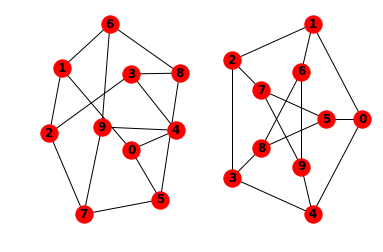

In [43]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

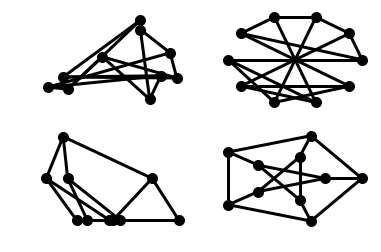

In [44]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)
plt.show()

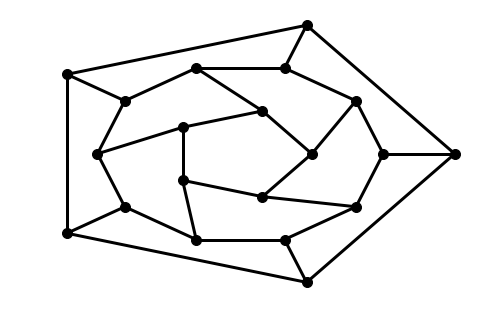

In [45]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)
plt.show()

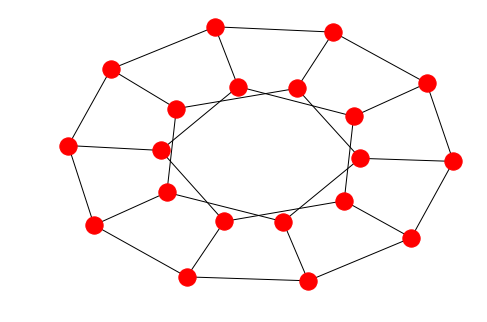

In [46]:
nx.draw(G)
plt.savefig("path.png")